Hello! My name is Keshav and this is my attempt at developing an algorithm to accurately predict the chance of breast cancer. 

Context: Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Content:
1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

# **1. Import**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# **2. Exploratory Data Analysis (EDA)**

In [4]:
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

A few important learnings:
- There is an unnamed college that has 0 non-null values, and will likely be deleted.
- Every other column shares the amount of non-null values so nothing will change in those.

In [8]:
print(df.isnull().sum().sum())

569


This means around half the total data is null.

In [13]:
y_val = df.diagnosis 
list = ['Unnamed: 32','id','diagnosis']
x_val = df.drop(list,axis = 1 )
x_val.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **3. Data Visualization**

diagnosis
B    357
M    212
Name: count, dtype: int64


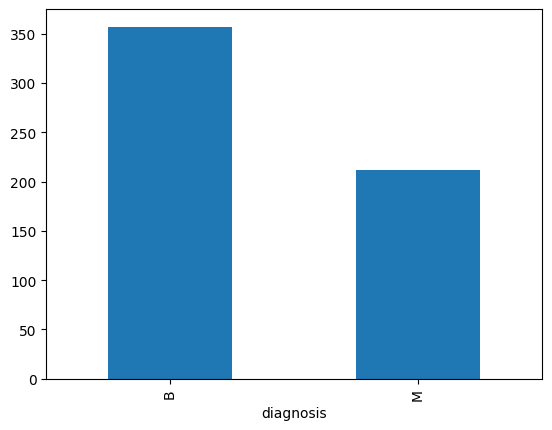

In [21]:
y_val.map(y_val)
print(y_val.value_counts())
p=y_val.value_counts().plot(kind="bar")

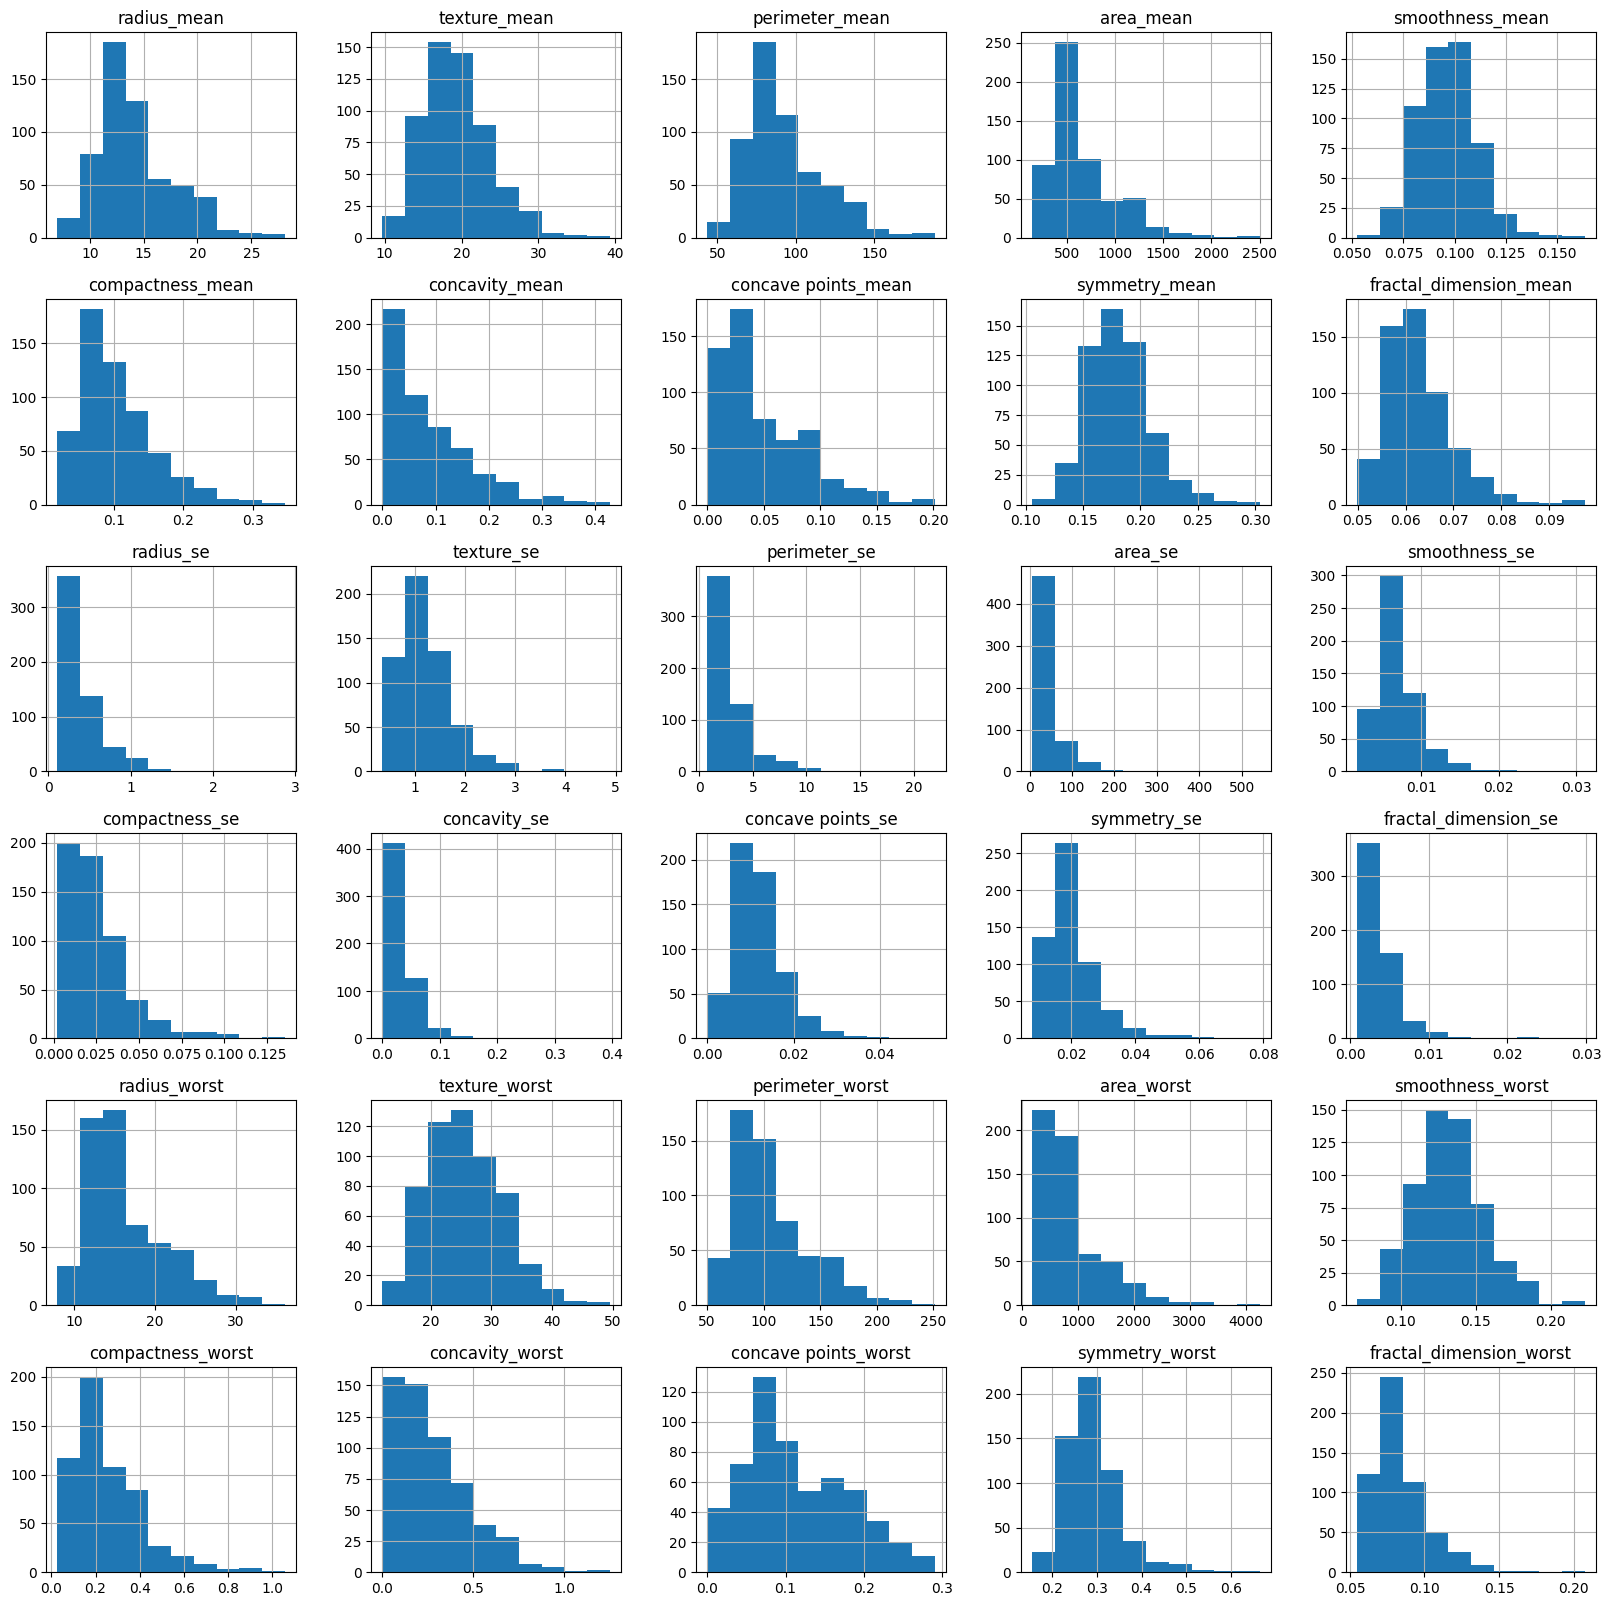

In [23]:
p = x_val.hist(figsize = (20,20))

In [27]:
print(x_val.isnull().sum().sum())

0


Perfect! This means our new x_val dataset has 0 null values.

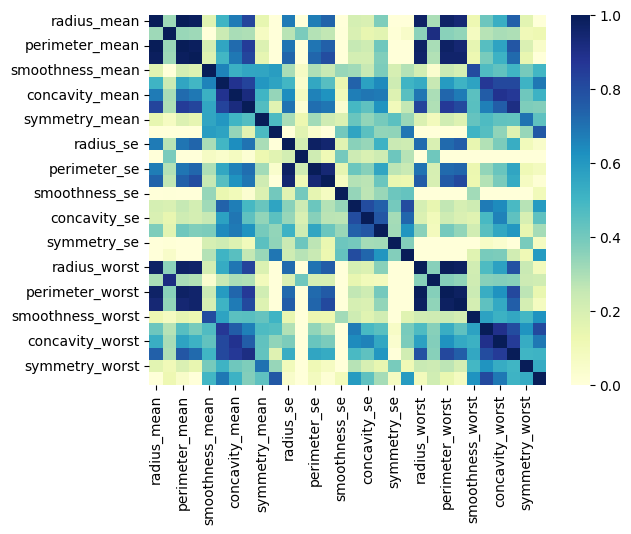

In [28]:
sns.heatmap(x_val.corr(), vmin=0, cmap="YlGnBu");

Unfortunately, this heatmap is too small to fit the large amount of columns so we have to use a modified one, preferrably with decimal indicators.

<Axes: >

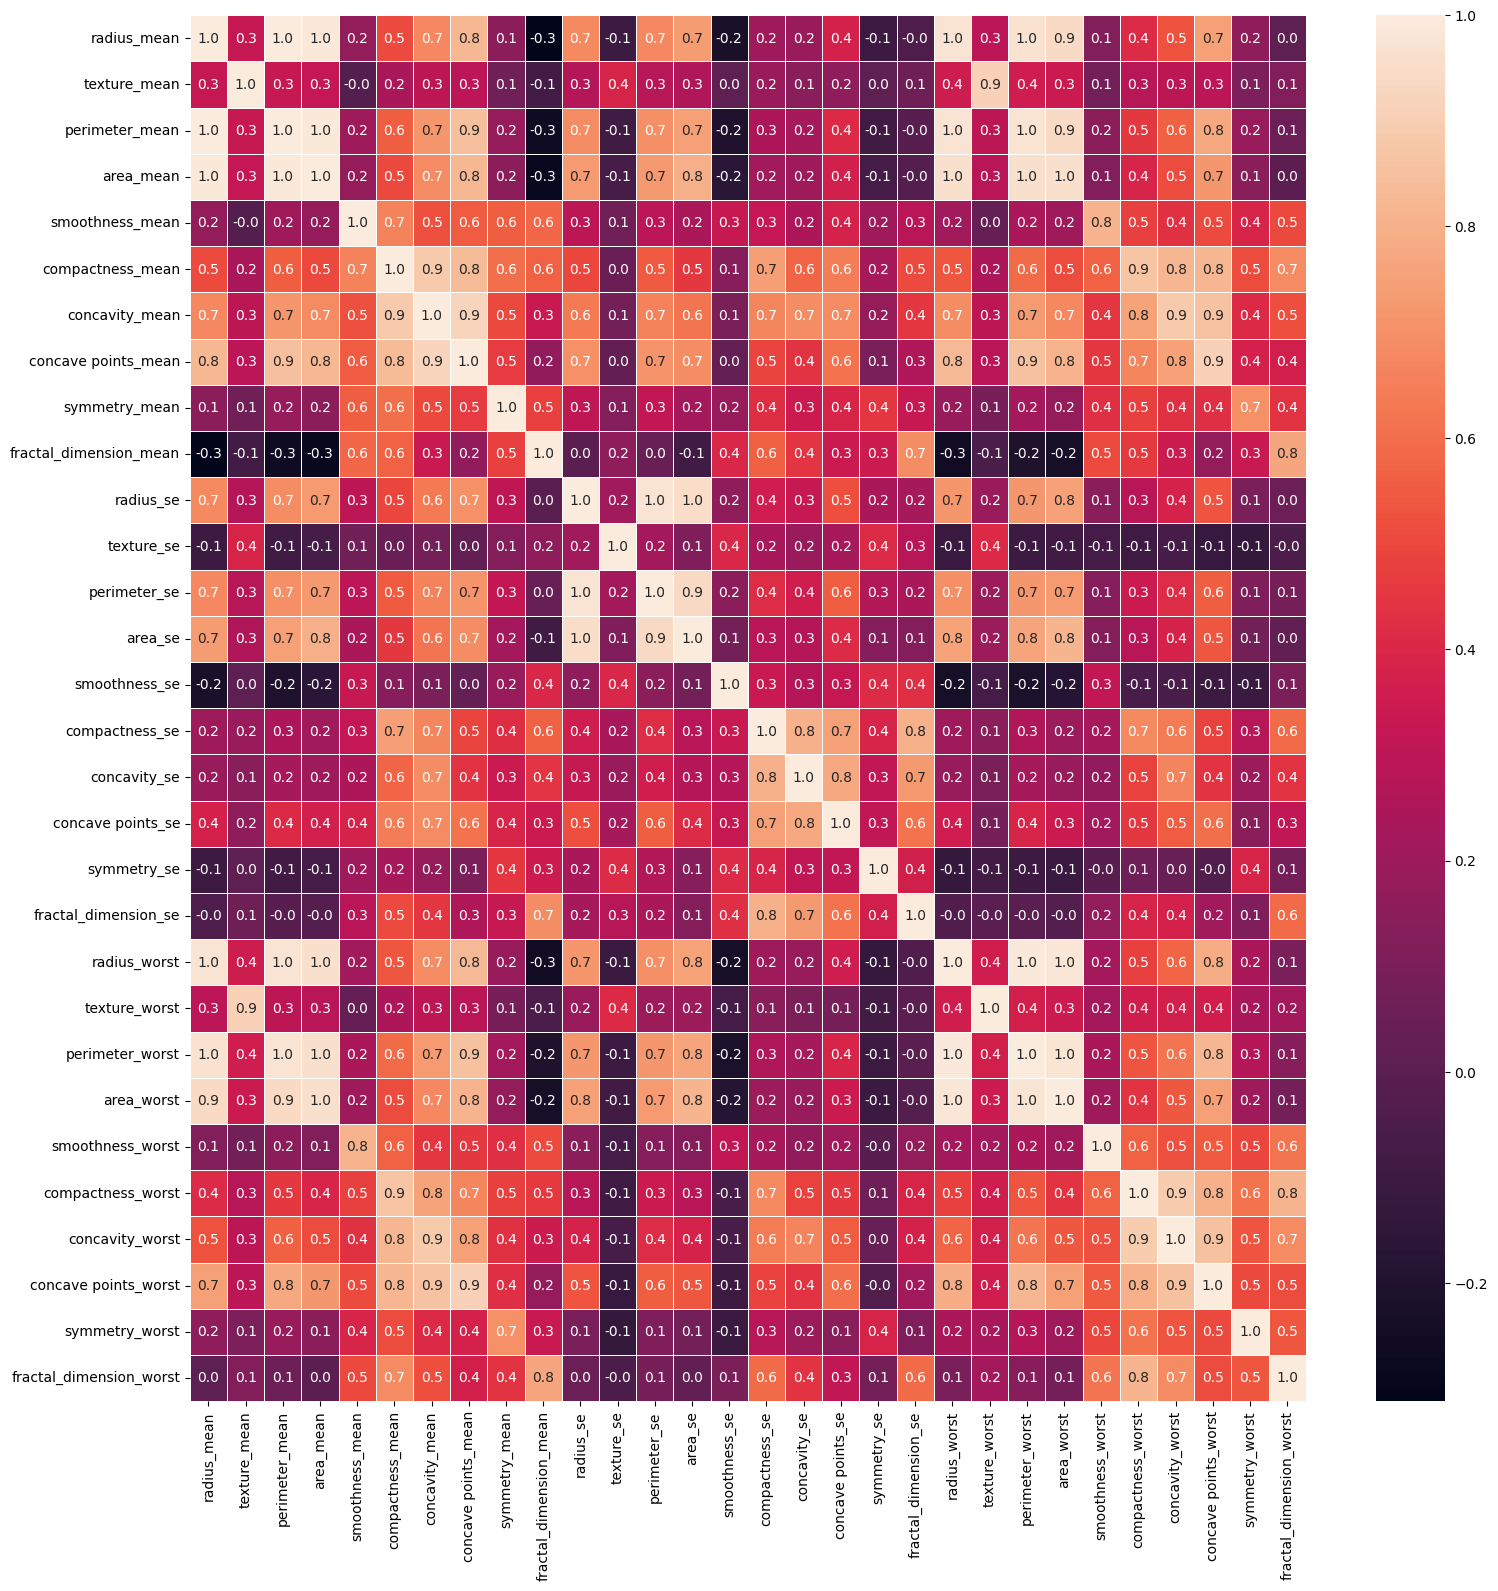

In [31]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x_val.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Some important overlap (correlation is ~ 1.0):
- radius_mean, perimiter_mean, area_mean, radius_worst, perimeter_worst, area_worst
- radius_se, perimeter_se, area_se

To eliminate these overlaps and optimize the models, I will eliminate all of them except the first one (radius_mean, radius_se).

In [33]:
list = ['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'perimeter_se', 'area_se']
x_val = x_val.drop(list,axis = 1 )
x_val.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **4. Model Development**

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.3, random_state=42)

### A. K-nearest neighbor (KNN)

KNN works on the principle of similarity. For a given data point, it looks at the 'K' closest data points, known as neighbors, to determine its classification or value. It's a method that assumes similar things exist in close proximity.

For more information: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
 
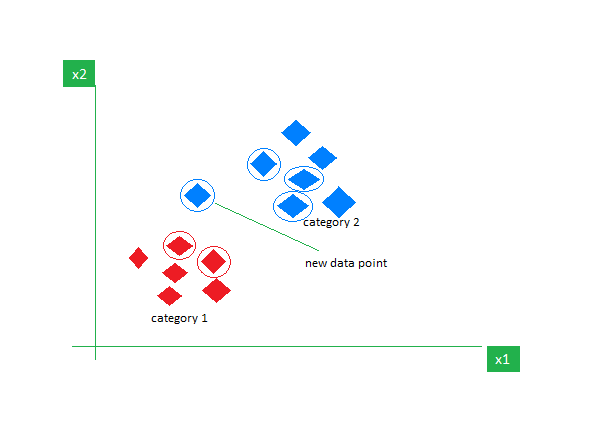

In [35]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

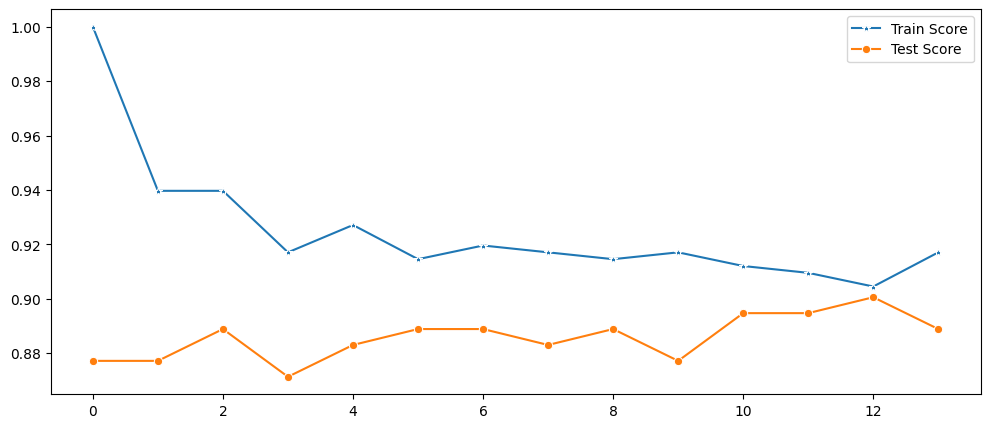

In [36]:
plt.figure(figsize=(12,5))
p = sns.lineplot(train_scores,marker='*',label='Train Score')
p = sns.lineplot(test_scores,marker='o',label='Test Score')

Looking at the above chart, we see that the test score is the highest at around 12 neighbors.

In [37]:
knn = KNeighborsClassifier(12)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [38]:
knn.score(x_test,y_test)

0.8947368421052632

### B. Logistic Regression

Logistic Regression predicts the probability that a data point belongs to a certain category. It is used for binary classification tasks (e.g., yes/no decisions) and works by applying a logistic function to a linear combination of features, transforming linear output into a probability.

For more information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [42]:
lr.score(x_test, y_test)

0.9707602339181286

### C. Decision Tree + Random Forest

An important consideration is whether to use a classifier or regressor, as both exist for Decision Tree and Random Forest.

Classifier is used for categorial outputs, often binaries such as "spam or not-spam" or "apple or orange".

Regressor is used for quantatative outputs, often numerical such as predicting price or amount.

In this case, it is best to choose the classifier beacuse the output is categorial and binary (malignant or benign).

A Decision Tree makes decisions by splitting data into branches at each level based on feature values. It resembles a flowchart, leading to a conclusion by asking a series of questions based on the features of the data, with each answer guiding the next question until a final prediction is made.

For more information: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
dtc.score(x_test, y_test)

0.9239766081871345

Random Forest builds upon the concept of a Decision Tree but combines the predictions of many trees to improve accuracy and reduce the risk of overfitting. It's like consulting a panel of experts instead of just one to make a decision, where each tree in the forest votes, and the most popular outcome becomes the model's prediction.

For more information: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
rfc.score(x_test, y_test)

0.9473684210526315

### D. Guassian NB

Gaussian Naive Bayes applies Bayes' theorem with the assumption of Gaussian (normal) distribution of features. It calculates the probability of each category based on the feature values and chooses the category with the highest probability. This model is especially effective for classification tasks where features are continuous and normally distributed.

For more information: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [49]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [50]:
gnb.score(x_test, y_test)

0.9239766081871345

# **6. Result Visualization**

To visualize the results for different algorithms, I defined a function visualize, that takes the model and outputs important metrics. These are:

Predict probability: The predict_proba method outputs a probability distribution for each value. In the case of binary classification, which applies to this dataset, predict_proba will output two probabilities for each input; the probability it has an output of 0 and the probability it has an output of 1. For the sake of clarity, it wasn't printed in this function. For more info: https://towardsdatascience.com/predict-vs-predict-proba-scikit-learn-bdc45daa5972

AUC (area under curve): The AUC refers to the Area Under the Receiver Operating Characteristic (ROC) Curve. This curve plots the true positive rate (TPR, also known as recall) against the false positive rate (FPR) at various threshold levels. The AUC value is a single scalar that summarizes the performance of a classifier across all possible thresholds, with a value of 1 representing a perfect classifier and a value of 0.5 representing a classifier that does no better than random guessing. For more info: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

Confusion Matrix: A confusion matrix is a table that visualizes the performance of a classification model by showing the actual versus predicted labels. It helps in understanding not only the errors made by the classifier but also the types of errors (false positives and false negatives). Here's an outline:

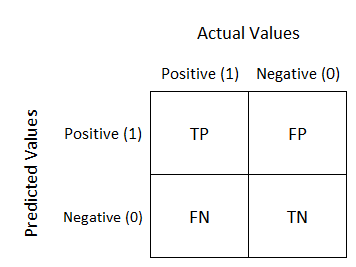

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
def visualize (modelName):
    
    # calculating the predict probability
    pred_test = modelName.predict_proba(x_test)[:, 1]
    pred_train = modelName.predict_proba(x_train)[:, 1]

    # calculate AUC of model
    test_auc = metrics.roc_auc_score(y_test, pred_test)
    train_auc = metrics.roc_auc_score(y_train, pred_train)

    # print results 
    print("\n")
    results = {modelName: {'test': test_auc, 'train': train_auc}}
    print(results)
    print(f'Confusion matrix: {confusion_matrix(y_test, modelName.predict(x_test))}')
    print("\n")

In [52]:
visualize(knn)
visualize(lr)
visualize(dtc)
visualize(rfc)
visualize(gnb)



{KNeighborsClassifier(n_neighbors=12): {'test': 0.9397413286302176, 'train': 0.971604538961214}}
Confusion matrix: [[103   5]
 [ 13  50]]




{LogisticRegression(max_iter=200, random_state=42): {'test': 0.9930922986478542, 'train': 0.9887604107705991}}
Confusion matrix: [[107   1]
 [  4  59]]




{DecisionTreeClassifier(random_state=42): {'test': 0.9232804232804233, 'train': 1.0}}
Confusion matrix: [[100   8]
 [  5  58]]




{RandomForestClassifier(random_state=42): {'test': 0.9871399176954733, 'train': 1.0}}
Confusion matrix: [[105   3]
 [  6  57]]




{GaussianNB(): {'test': 0.9776601998824221, 'train': 0.9743133608258537}}
Confusion matrix: [[102   6]
 [  7  56]]




Wow! These are phenomenal scores with extremeley high accuracy. On first glance, Logistic Regression seems to be the most accurate with a test score of 99% followed closely by Random Forest and Gaussian NB

# **7. Hypertuning**

In [53]:
model_params = {
    'LR': {
        'max_iter': [800, 900, 1000],
        'C': [1.0, 10.0],
        'penalty': ['l2']
    },
    'KNN' : {
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2, 3], 
    },
    'DTC':{
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 3, 4, 5, 6, 7],
        'splitter' : ['best', 'random']
    },
    'RFC': {
        'max_features': ['log2', 'sqrt'],
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [2, 3, 4],
        'criterion': ['gini', 'entropy']
    },
    'GNB':{
        'var_smoothing': np.logspace(0,-9, num=100)
    }
}

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [55]:
def hypTune(model, param):
    scorer = metrics.make_scorer(metrics.roc_auc_score, needs_proba=True)
    new_mod = GridSearchCV(model, param_grid=param, scoring=scorer,
                         n_jobs=-1, cv=5, verbose=1)
    return new_mod

In [56]:
# random forest
test_csv = hypTune(rfc, model_params["RFC"])
test_csv.fit(x_train, y_train)
print(f'RF Best params: {test_csv.best_params_}')
print(f'RF Best score: {test_csv.best_score_}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
RF Best params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
RF Best score: 0.9855157400891391


Whew! That took a while.To replicate and condense this, we'll develop a function to hypertune each model.

In [57]:
def hypertune(model, modelName):
    tune_csv = hypTune(model, model_params[modelName])
    tune_csv.fit(x_train, y_train)
    print("\n")
    print(modelName + f' Best params: {tune_csv.best_params_}')
    print(modelName + f' Best score: {tune_csv.best_score_}')
    return tune_csv.best_estimator_

In [58]:
from sklearn.base import clone

knn_tune = hypertune(clone(knn), "KNN")
lr_tune = hypertune(clone(lr), "LR")
dtc_tune = hypertune(clone(dtc), "DTC")
rfc_tune = hypertune(clone(rfc), "RFC")
gnb_tune = hypertune(clone(gnb), "GNB")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


KNN Best params: {'algorithm': 'auto', 'p': 1, 'weights': 'distance'}
KNN Best score: 0.9701037766830872
Fitting 5 folds for each of 6 candidates, totalling 30 fits


LR Best params: {'C': 10.0, 'max_iter': 800, 'penalty': 'l2'}
LR Best score: 0.9894038939713816
Fitting 5 folds for each of 24 candidates, totalling 120 fits


DTC Best params: {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
DTC Best score: 0.9521134881538822
Fitting 5 folds for each of 60 candidates, totalling 300 fits


RFC Best params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
RFC Best score: 0.9855157400891391
Fitting 5 folds for each of 100 candidates, totalling 500 fits


GNB Best params: {'var_smoothing': 0.0003511191734215131}
GNB Best score: 0.9872152005629837


# **8. Conclusion**

Congrats on sticking through the whole way! Here are some important key observations:

- Logistic Regression had the highest AUC score (99%) among all other models, closely followed by RFC and GNB
- All algorithms have an AUC of above 90%, which means they are extremeley reliable
- However, much work could be done to further optimize the algorithm as well as modify the data to produce the best results possible!